# Bernstein-Vazirani Algorithm

このセクションでは、最初に"Bernstein-Vazirani problem"、その古典的な解、及びそれを解決するための量子アルゴリズムを紹介します。次に、Qiskitを使用して量子アルゴリズムを実装し、シミュレータとデバイスの両方で実行します。

## 1. The Bernstein-Vazirani Algorithm

Bernstein-Vazirani Algorithmは、前のセクションで説明したDeutsch-Josza Algorithmの拡張と見なすことができます。それは、量子コンピュータを、Deutsch-Josza問題よりも複雑な問題の計算ツールとして使用することに利点がある可能性があることを示しました。

### 1.1 The Bernstein-Vazirani Problem

ここでも、入力としてビットの文字列$(x)$をとり、$0$または$1$のいずれかを返すブラックボックス関数$f$が与えられます。

$f(${$x_0,x_1,x_2,...$}$)$→$0\,or\,1\,where\,x_n\,is\,0\,or\,1$

Deutsch-Josza問題のように関数がconstantまたはbalancedである代わりに、関数は入力となんらかの文字列$s$のビットごとの積を返すことが保証されています。言い換えると、入力$x$が与えられると、$f(x)=s×x(mod\,2)$になります。$s$が見つかると予想されます。古典的な可逆回路としてBernstein-Vazirani oracleは次のようになります。

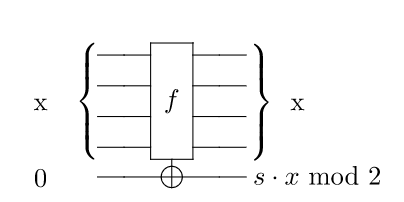

### 1.2 The Classical Solution

古典的に、オラクルは次のように返します。

$f_s(x)=s×x\quad mod\,\, 2$ 

入力$x$が与えられます。従って、非表示のビット文字列$s$は、入力のシーケンスを使用して、オラクルをクエリすることで明らかにできます。

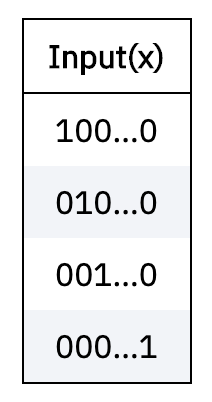

各クエリは、$s$の異なるビット(ビット$s_i$)を明らかにします。例えば、x=1000...0の場合、$s$の最下位ビットを取得できます。x=0100...0の場合、次の最下位ビットを見つけることができます。つまり、関数$f_s(x)$を$n$回呼び出す必要があります。

### 1.3 The Quantum Solution

量子コンピュータを使用すると、関数$f(x)$を1回呼び出すだけで、この問題を100%の信頼度で解決できます。隠されたビット文字列を見つける"quantum Bernstein-Vazirani algorithm"は非常に簡単です。

1. 入力qubitを$|0>^{⊗n}$状態に初期化し、出力qubitを$|->$に初期化します。
2. アダマールゲートを入力レジスタに適用する。
3. オラクルに問い合わせる。
4. アダマールゲートを入力レジスタに適用する。
5. 測定

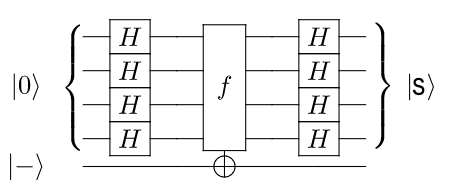

アルゴリズムを説明するために、各qubitにHゲートを適用するとどうなるかを詳しく見てみましょう。n-qubitが状態|a>にあり、Hゲートを適用すると、変換が表示されます。

$|a\rangle \xrightarrow{H^{⊗n}}\frac{1}{\sqrt{2^n}} \Sigma_{x∈\{0,1\}^n}^{} (-1)^{a \cdot x}|x\rangle$

##### Explain Equation

特に、量子レジスタ$|00 \ldots 0 \rangle$から始めて、$n$アダマールゲートをそれに適用すると、おなじみの量子重ね合わせが得られます。

$|00 \ldots 0\rangle \xrightarrow{H^{⊗n}}	\frac{1}{\sqrt{2^n}} \Sigma_{x∈\{0,1\}^n}^{} |x\rangle$

この場合、位相項$(-1)^{a \cdot x}$は、$a=0$なので、$(-1)^{a \cdot x}=1$となり消えます。

従来のオラクル$f_s$は、$s \cdot x \,\, mod\,\,2=1$となる入力$x$に対して$1$を返し、それ以外の場合は$0$を返します。Deutsch-Jozaアルゴリズムの同じフェーズキックバックトリックを使用して、状態|->のqubitに作用すると、次の変換が得られます。

$|x\rangle \xrightarrow{f_s} (-1)^{s \cdot x}|x \rangle$

$|00 \ldots 0\rangle$ のアダマール変換から得られた量子重ね合わせで量子オラクル$f_s$を照会することにより、隠れたビット文字列を明らかにするアルゴリズムが自然に実行されます。つまり、

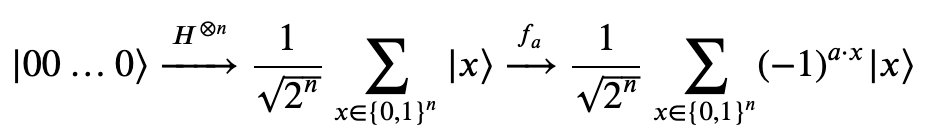

$n$個のアダマールゲートの逆数は、$n$個のアダマールゲートであるため、

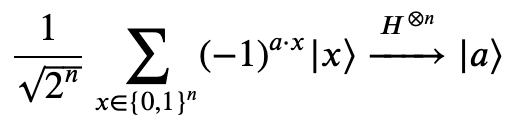

## 2. Example

$n=2$qubitと秘密の文字列$s=11$の具体例を見てみましょう。レジスターを1つだけ使用して、Bernstein-Vazirani quantum oracleの回路を生成していることに注意してください。

1. 2つのqubitのレジスタを0に初期化します。

$\quad\quad  |ψ_0 \rangle = |00 \rangle$

2. 両方のqubitにアダマールゲートを適用します。

$\quad \quad |ψ_1 \rangle = \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)$

3. 文字列$s=11$の場合、量子オラクルは演算を実行します。

$\quad \quad|x\rangle \xrightarrow{f_s} (-1)^{x\cdot 11}|x\rangle$

$\quad \quad |ψ_2\rangle = \frac{1}{2}((-1)^{00 \cdot 11} |00\rangle +  (-1)^{01 \cdot 11} |01\rangle +(-1)^{10 \cdot 11}|10\rangle + (-1)^{11\cdot 11}|11\rangle)$

$\quad \quad |ψ_2\rangle = \frac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle)$

4. 両方のqubitにアダマールゲートを適用します。

$\quad \quad  |ψ_3\rangle = |11\rangle$

5. 秘密の文字列$s=11$を見つけるために測定します。

以下のウィジェット"bv_widget"を使用してください。ボタンを押して、様々なステップを適用し、アルゴリズムに従ってください。入力qubitの数と秘密の文字列の値は、最初の2つの位置引数を使用して変更できます。

In [1]:
from qiskit_textbook.widgets import bv_widget
bv_widget(2, "11")

ModuleNotFoundError: No module named 'qiskit_textbook'

## 3. Qiskit Implementation

次に、$s=011$の3ビット関数用のQiskitでのBernstein-Vaziraniアルゴリズムの実装について説明します。

In [2]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

最初に、実験で使用されるqubitの数と、アルゴリズムによって検出される非表示のビット文字列$s$を設定します。隠されたビット文字列$s$は、量子オラクルの回路を決定します。

In [3]:
n = 3 # number of qubits used to represent s
s = '011'   # the hidden binary string

次に、Qiskitを使用してBernstein-Vaziraniアルゴリズムをプログラムします。

In [4]:
# We need a circuit with n qubits, plus one ancilla qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put ancilla in state |->
bv_circuit.h(n)
bv_circuit.z(n)

# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()

┌───┐      ░                 ░ ┌───┐┌─┐      
q_0: ┤ H ├──────░───■─────────────░─┤ H ├┤M├──────
     ├───┤      ░   │             ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├──────░───┼─────────■───░─┤ H ├─╫─┤M├───
     ├───┤      ░   │  ┌───┐  │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├──────░───┼──┤ I ├──┼───░─┤ H ├─╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐└───┘┌─┴─┐ ░ └───┘ ║  ║ └╥┘
q_3: ┤ H ├┤ Z ├─░─┤ X ├─────┤ X ├─░───────╫──╫──╫─
     └───┘└───┘ ░ └───┘     └───┘ ░       ║  ║  ║ 
c_0: ═════════════════════════════════════╩══╬══╬═
                                             ║  ║ 
c_1: ════════════════════════════════════════╩══╬═
                                                ║ 
c_2: ═══════════════════════════════════════════╩═

#### 3a. Experiment with Simulators

上記の回路をシミュレータで実行できます。

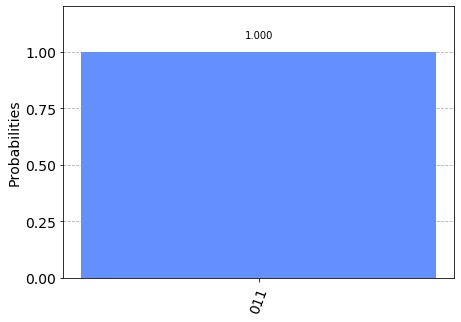

In [5]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(bv_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

測定結果は隠し文字列011であることがわかります。

#### 3b.  Experiment with Reaal Devices

以下のように実際のデバイスで回路を実行できます。

In [6]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmqx2


In [7]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(bv_circuit, backend=backend, shots=shots)

job_monitor(job, interval = 2)

Job Status: job has successfully run


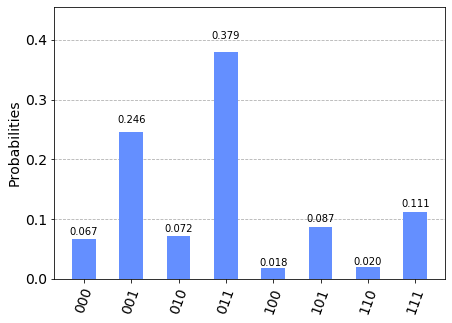

In [8]:
# Get the results from the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

ご覧の通り、ほとんどの結果は011です。その他の結果は、量子計算のエラーが原因です。